# Analysis of Netflix films "Are films getting shorter?"

In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [115]:
#Importing file
netflix_df = pd.read_csv("netflix_data.csv")

In [116]:
#Inspecint data to see what columns we have
print(netflix_df.head())

  show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year  duration  \
0    August 14, 2020          2020         4   
1  December 23, 2016          2016        93   
2  December 20, 2018          2011        78   
3  November 16, 2017          2009        80   
4    January 1, 2020          2008       123

In [117]:
#Pivot table
netflix_piv = netflix_df.pivot_table(values = "duration", index = "release_year", aggfunc = np.mean)
print(netflix_piv)

               duration
release_year           
1925           1.000000
1942          35.000000
1943          62.666667
1944          52.000000
1945          51.333333
...                 ...
2017          70.213439
2018          63.553970
2019          55.382530
2020          43.440092
2021          32.193548

[73 rows x 1 columns]


In [118]:
avg_duration_peryear_df = netflix_df.groupby("release_year")["duration"].mean()
print(avg_duration_peryear_df)

release_year
1925     1.000000
1942    35.000000
1943    62.666667
1944    52.000000
1945    51.333333
          ...    
2017    70.213439
2018    63.553970
2019    55.382530
2020    43.440092
2021    32.193548
Name: duration, Length: 73, dtype: float64


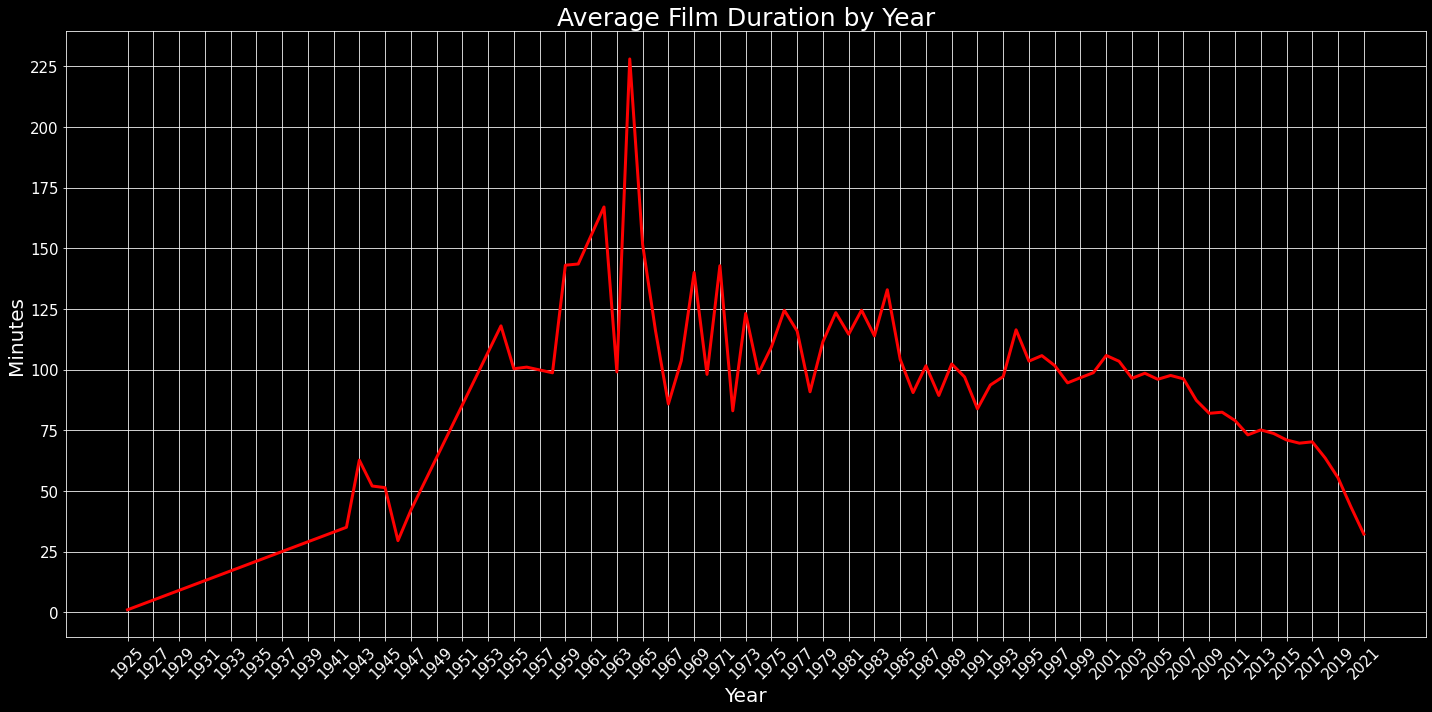

In [119]:

plt.style.use('dark_background')
plt.figure(figsize = (20,10))
plt.plot(avg_duration_peryear_df, lw = 3, color = 'r')
plt.ylabel('Minutes', size = 20)
plt.xlabel('Year', size = 20, )
plt.title("Average Film Duration by Year", size = 25)
plt.xticks(range(1925, 2022, 2), rotation=45, fontsize=15)
plt.yticks(range(0, 250, 25),  fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()




# Looks like films are getting shorter! However this data includes Tv_shows and short films so to get a better picture we will have to remove them

In [120]:
#Removing Tv_shows and non-feature length films
long_film_df1 = netflix_df.loc[(netflix_df['type'] == "Movie") & (netflix_df["duration"] > 40)]
print(long_film_df1.head())

  show_id   type  title           director  \
1      s2  Movie   7:19  Jorge Michel Grau   
2      s3  Movie  23:59       Gilbert Chan   
3      s4  Movie      9        Shane Acker   
4      s5  Movie     21     Robert Luketic   
6      s7  Movie    122    Yasir Al Yasiri   

                                                cast        country  \
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   
6  Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...          Egypt   

          date_added  release_year  duration  \
1  December 23, 2016          2016        93   
2  December 20, 2018          2011        78   
3  November 16, 2017          2009        80   
4    January 1, 2020          2008       123   
6       June 1, 2020          2019        95   

       

In [121]:
avg_duration_peryear_long_film_df = long_film_df1.groupby("release_year")["duration"].mean()
print(avg_duration_peryear_long_film_df)

release_year
1942    52.000000
1943    62.666667
1944    76.000000
1945    61.000000
1946    58.000000
          ...    
2017    96.209877
2018    98.004196
2019    97.197822
2020    95.714286
2021    91.600000
Name: duration, Length: 72, dtype: float64


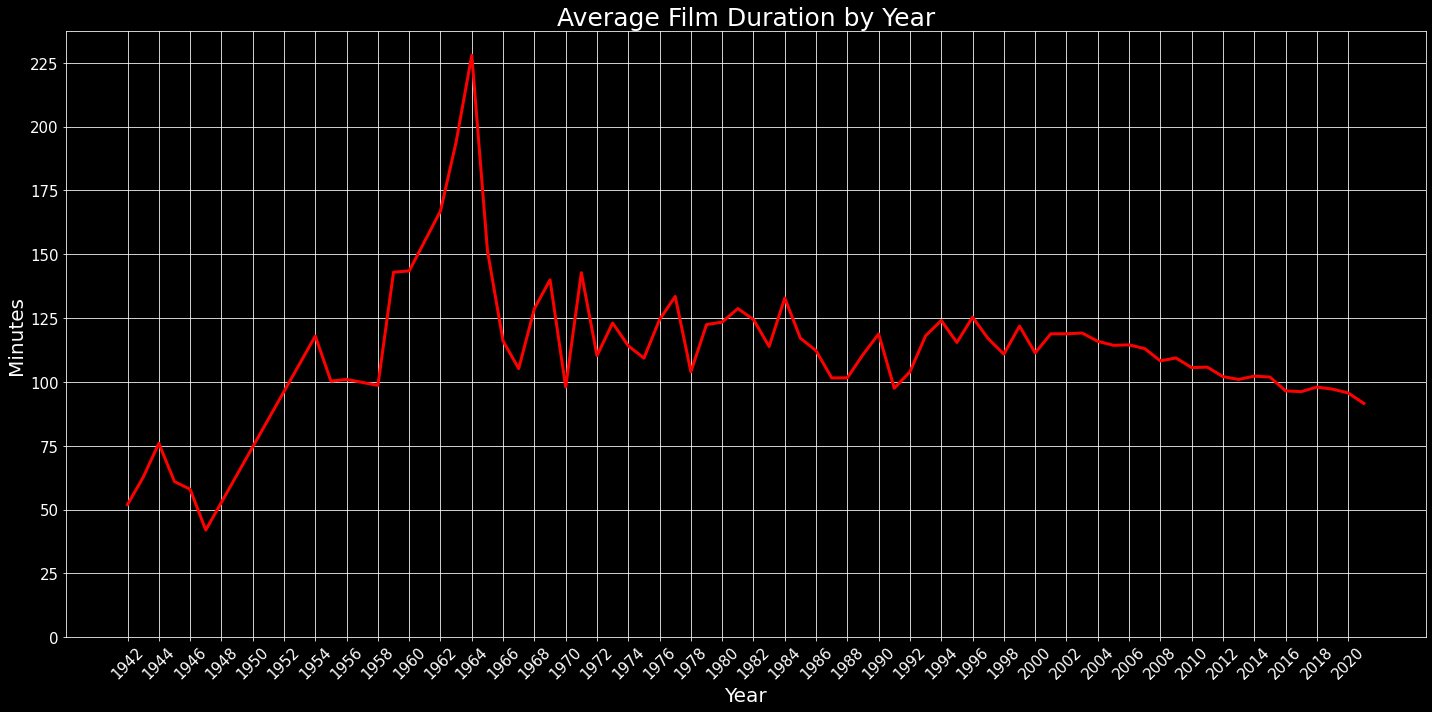

In [122]:
plt.style.use('dark_background')
plt.figure(figsize = (20,10))
plt.plot(avg_duration_peryear_long_film_df, lw=3,color = 'r')
plt.ylabel('Minutes', size = 20)
plt.xlabel('Year', size = 20, )
plt.title("Average Film Duration by Year", size = 25)
plt.xticks(range(1942, 2022, 2), rotation=45, fontsize=15)
plt.yticks(range(0, 250, 25),  fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()
plt.show()

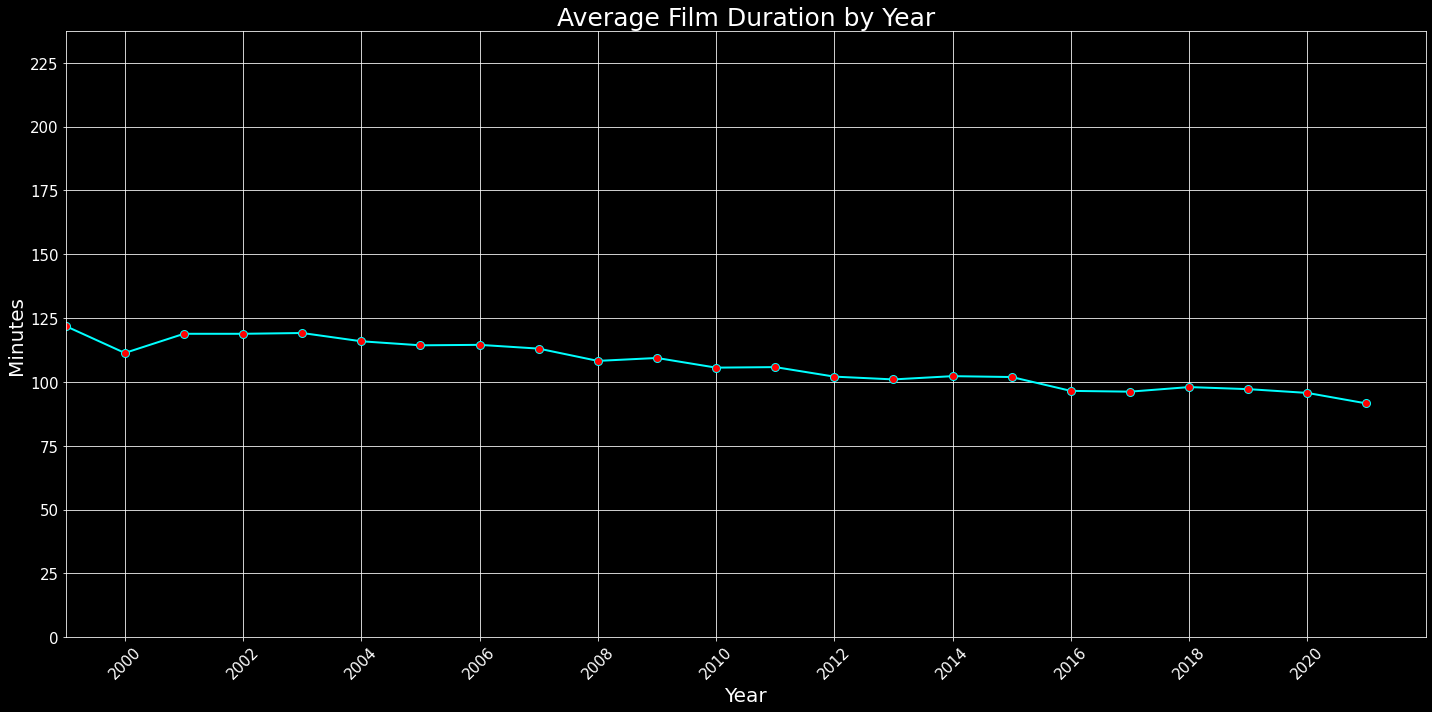

In [123]:
plt.style.use('dark_background')
plt.figure(figsize = (20,10))
plt.plot(avg_duration_peryear_long_film_df, marker = 'o',lw = 2, mfc = "r", color = "cyan", markersize = 8)
plt.ylabel('Minutes', size = 20)
plt.xlabel('Year', size = 20, )
plt.title("Average Film Duration by Year", size = 25)
plt.xticks(range(1942, 2022, 2), rotation=45, fontsize=15)
plt.yticks(range(0, 250, 25),  fontsize=15)
plt.xlim(1999,2022)
plt.grid()
plt.tight_layout()
plt.show()
plt.show()

# Creating a color coded scatter plot to visualise how non-feature and Tv Show types affected the original results

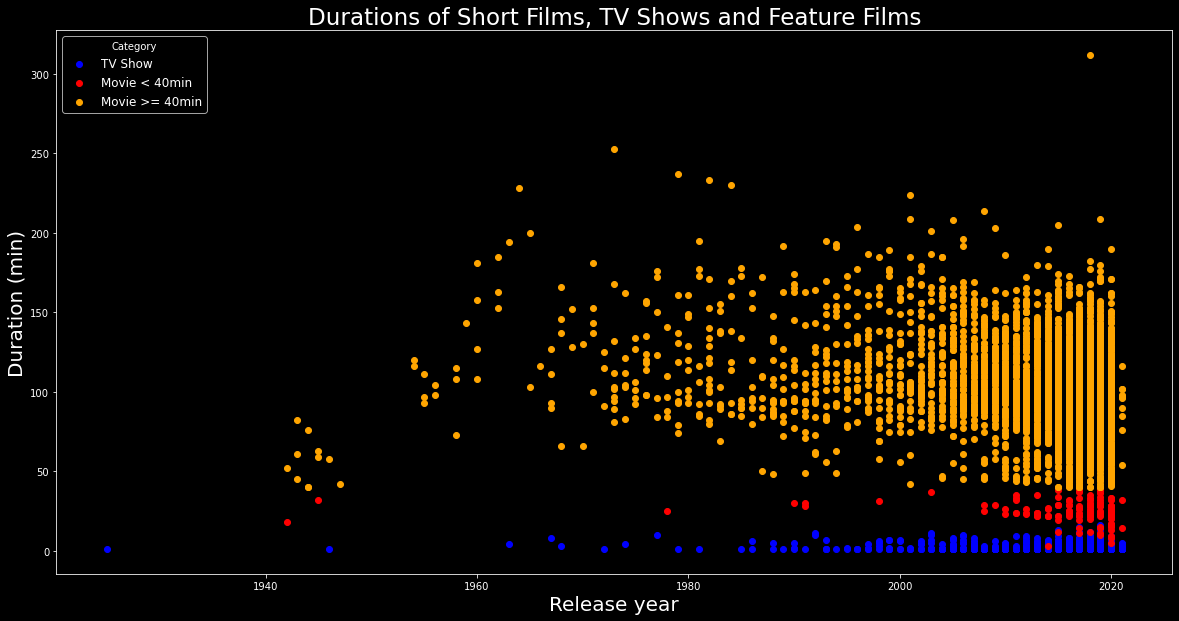

In [146]:
netflix_movies_col_subset = netflix_df[['title','type', 'country','genre','release_year','duration']]

fig = plt.figure(figsize=(20,10))

labels = ["TV Show", "Movie < 40min", "Movie >= 40min"]

# Create a scatter plot for each category
plt.scatter(netflix_movies_col_subset.release_year[netflix_movies_col_subset['type'] == 'TV Show'], 
            netflix_movies_col_subset.duration[netflix_movies_col_subset['type'] == 'TV Show'], 
            color='blue', label='TV Show')

plt.scatter(netflix_movies_col_subset.release_year[(netflix_movies_col_subset['type'] == 'Movie') & 
                                                    (netflix_movies_col_subset['duration'] < 40)], 
            netflix_movies_col_subset.duration[(netflix_movies_col_subset['type'] == 'Movie') & 
                                                (netflix_movies_col_subset['duration'] < 40)], 
            color='red', label='Movie < 40min')

plt.scatter(netflix_movies_col_subset.release_year[(netflix_movies_col_subset['type'] == 'Movie') & 
                                                    (netflix_movies_col_subset['duration'] >= 40)], 
            netflix_movies_col_subset.duration[(netflix_movies_col_subset['type'] == 'Movie') & 
                                                (netflix_movies_col_subset['duration'] >= 40)], 
            color='orange', label='Movie >= 40min')

plt.legend(title="Category", labels=labels, loc="upper left") 
plt.title("Durations of Short Films, TV Shows and Feature Films", size = 23)
plt.xlabel("Release year", size = 20)
plt.ylabel("Duration (min)", size =20)
plt.legend(title="Category", labels=labels, loc="upper left", fontsize = "large")
plt.show()
